In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.table import Table
from astropy.nddata import NDData
from astropy.visualization import simple_norm
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.io import ascii
from photutils import DAOStarFinder
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from photutils.psf import IterativelySubtractedPSFPhotometry as ISPSF
from photutils.psf import extract_stars
from photutils.psf.groupstars import DAOGroup
from photutils import EPSFBuilder
from photutils.background import MMMBackground
from photutils.utils import make_random_cmap

In [12]:
# could add a check to see if apertures need to be plotted (in case i want to plot just the fits)
def plotting(region, ap, an, cmap):
    plt.imshow(region, cmap=cmap, origin='lower', norm=LogNorm(), interpolation='nearest')
    ap.plot(color='blue', lw=.5, alpha=.5)
    an.plot(color='red', lw=.5, alpha=.5)
    plt.colorbar()
    plt.grid(True)
    plt.gcf().set_size_inches(10, 6)
    plt.show()
    
def print_table_nicely(table):   # note: 'table' must be an astropy Table type
    for col in table.colnames:
        table[col].info.format = '%.8g'
    print(table)
    
def ap_phot(data, ap, an, method):
    all_apers = [ap, an]
    table = aperture_photometry(data, all_apers)
    
    if method == 'mean':
        bkg_mean = table['aperture_sum_1'] / an.area
        table['bkg_sum_mean'] = bkg_mean * ap.area
        table['sum_mean'] = table['aperture_sum_0'] - table['bkg_sum_mean']
    
    elif method == 'median':
        annulus_masks = an.to_mask(method='center')
        bkg_median = []
        for mask in annulus_masks:
            annulus_data = mask.multiply(data)
            annulus_data_1d = annulus_data[mask.data > 0]
            _, median_mask, _ = sigma_clipped_stats(annulus_data_1d)
            bkg_median.append(median_mask)
            
        bkg_median = np.array(bkg_median)
        table['bkg_sum_median'] = bkg_median * ap.area
        table['sum_median'] = table['aperture_sum_0'] - table['bkg_sum_median']
        
    else:
        print('\n\nPlease give a valid method thx\n\n')
    
    return table

data/PAL5\PAL5__e1\PAL5__e1_3p6um.fits
EXPTIME: 71.3724
FLUXCONV: 0.1257
Mean: 43.87881851196289
Median: 42.92154312133789
Std dev: 13.865745544433594


No. of stars detected: 677


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


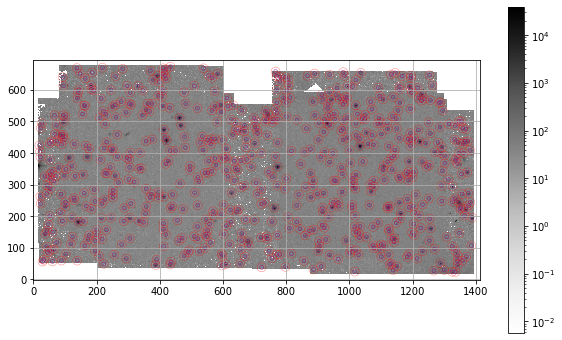

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1335.7201 23.327156            nan            nan
  2  1017.072 24.456139            nan            nan
  3 1325.4233 24.020858            nan            nan
  4 1267.5653 27.531396       9585.387            nan
  5 1138.3723 28.990912      8149.8819            nan
  6  1300.237 29.593042      14476.662            nan
  7 886.23986 30.962482            nan            nan
  8 722.22393 37.943258            nan            nan
  9 797.63943 39.455565            nan            nan
 10 910.48561  40.64482      6133.7272      20233.213
...       ...       ...            ...            ...
668 980.18034 655.72281            nan            nan
669 766.39616  657.8145            nan            nan
670 370.13387 660.44529      7980.4133      25240.242
671 419.57363 664.80689      9506.3575            nan
672  282.3413 666.48873     

No. of stars detected: 683


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


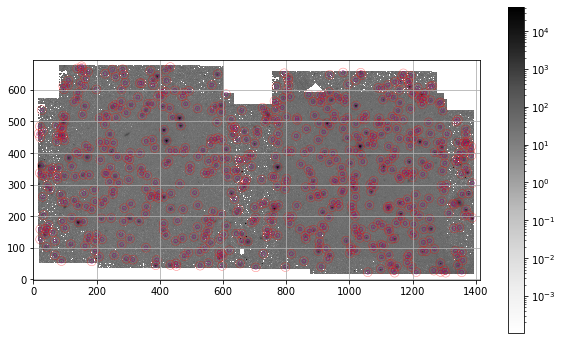

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1143.0406 21.236734            nan            nan
  2 1304.4602 21.069293            nan            nan
  3  1058.107 22.495744            nan            nan
  4 1211.4502 22.927108            nan            nan
  5 1355.4941 22.581533            nan            nan
  6 1288.3385 23.396981            nan            nan
  7 1267.5258 27.509154      8337.2859            nan
  8 1138.3435 28.886211      6534.0082            nan
  9 1300.7853 29.416995       13988.29            nan
 10  1099.184 32.780989      20814.406      18177.829
...       ...       ...            ...            ...
674 979.95881 654.60037            nan            nan
675 172.30377 656.66224      11097.202      17847.616
676 369.78351 660.02574      6005.8507      19031.692
677 250.21198 664.09942      4705.0801            nan
678 419.36842 663.96082     

No. of stars detected: 688


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


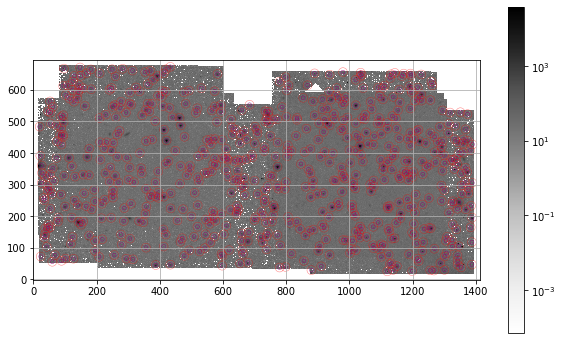

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1119.7936 25.329955      14699.541            nan
  2 1198.7198  26.08576      4208.1703            nan
  3 1255.7013 28.478483      6195.5094            nan
  4 1267.6772 27.924349       8689.486            nan
  5 879.79158 29.075147            nan            nan
  6 1138.0849 29.613826       6579.771            nan
  7  1300.739 29.795094      13388.577            nan
  8  1353.631 37.897316      5867.3117      50485.575
  9 778.96331 37.410979            nan            nan
 10  797.7038 39.325739            nan            nan
...       ...       ...            ...            ...
679 979.53617 655.92894            nan            nan
680 369.65259 660.19444      7667.3131      19866.883
681 313.53387 660.94671      4273.0831      16431.722
682 249.13306 664.97305       4962.696            nan
683 181.88788  664.5154     

No. of stars detected: 676


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


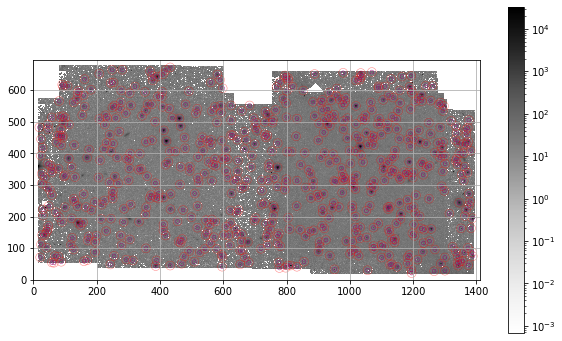

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1195.3947 21.719929            nan            nan
  2 1266.4097 27.618992      8329.6667            nan
  3 1300.3429 29.117406      13936.021            nan
  4 1055.9377 30.719055      3741.4145            nan
  5  1194.145 32.459832      4739.9278            nan
  6  951.4771 33.404809      6759.5745      15849.059
  7 777.38703 37.707483            nan            nan
  8 796.88787 38.596421            nan            nan
  9  1149.274 41.266713      19350.089      20960.974
 10 596.10019 41.938395            nan            nan
...       ...       ...            ...            ...
667 888.46475 650.81396      9253.9501            nan
668 207.84856  651.9337      3812.9693            nan
669 978.87653 654.55613            nan            nan
670 1034.3852 653.96228            nan            nan
671 1069.5484 657.07786     

No. of stars detected: 653


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


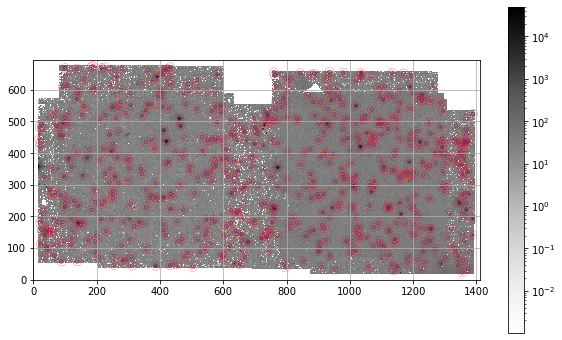

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1355.0031 22.310307            nan            nan
  2 1138.1588 28.656852      5927.5277            nan
  3 955.91128 31.177716      3582.2557            nan
  4 1224.6907 32.777966      5799.4645      21524.618
  5 1373.7286  34.63679      7059.2231            nan
  6 796.92973 38.026301            nan            nan
  7 910.39613 39.255448      4690.2145      13824.094
  8 503.92493 39.629696            nan            nan
  9 1059.4737 41.443486      4376.8556       14381.98
 10 1149.6363 40.791747      19077.659      21624.809
...       ...       ...            ...            ...
644 280.62038 664.00036      4272.6084            nan
645 362.00785 663.92958      3906.6305            nan
646 423.71123 665.12692      6688.6248            nan
647 136.33299 666.30366      5633.1184            nan
648 99.759542 668.53618     

No. of stars detected: 655


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


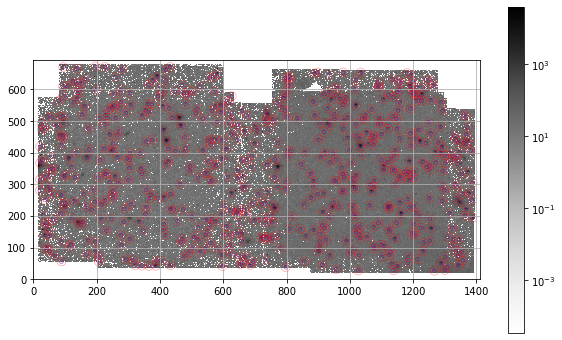

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1026.4325 27.327936      3747.3813            nan
  2 1267.3934 26.781435      7575.0333            nan
  3 1138.1841 28.213359       5435.508            nan
  4 1300.3707 28.818204      13544.085            nan
  5 956.72583 30.842787       3813.384            nan
  6  797.6158 37.707478            nan            nan
  7 1309.0706 38.354555      6542.7237      32348.915
  8 1149.9732 40.579042      18358.278      18181.235
  9 596.76531 41.065528            nan            nan
 10 364.02923 41.930108      2348.5863            nan
...       ...       ...            ...            ...
646 978.58578 653.66424            nan            nan
647 1034.5789  653.0847            nan            nan
648 897.58147 653.58645            nan            nan
649 280.45876 663.18873      3821.3619            nan
650 417.90591  662.4829     

No. of stars detected: 699


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


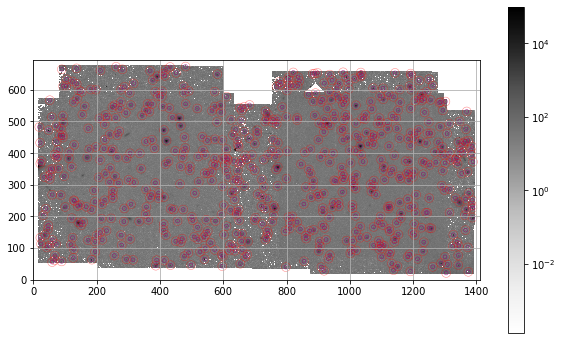

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1304.3555 20.641835            nan            nan
  2 1374.4526 24.165396            nan            nan
  3 1191.4556 25.623682      4081.2249            nan
  4 918.57507 27.613847      3071.0764            nan
  5 1138.1234 29.400211      6728.2246            nan
  6 797.96141 39.193395            nan            nan
  7 910.25658 39.261468      4904.1367      14909.721
  8 1261.9814  39.98404      6803.9686      26712.848
  9 596.85985 42.140848            nan            nan
 10 1150.2582 41.944282      20117.566      22786.271
...       ...       ...            ...            ...
690 978.78564 654.87137            nan            nan
691 211.85626 660.43975      6364.5172      20760.757
692 368.78716 659.42791      6687.9881      20480.806
693 89.614077 664.35483            nan            nan
694 281.09574 664.34255     

No. of stars detected: 660


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


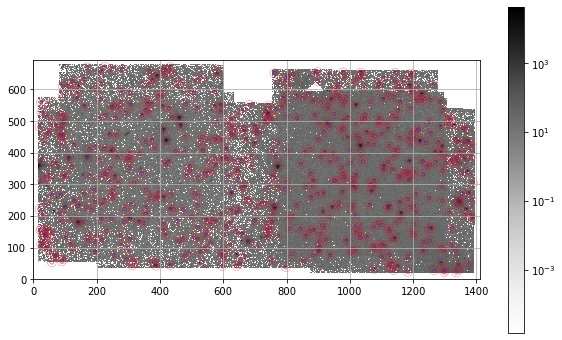

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1  1298.351 22.960082            nan            nan
  2 1335.8505 21.790807            nan            nan
  3 1183.0302 23.372805            nan            nan
  4 1268.0035 27.549078      7321.5926            nan
  5 1138.5766 28.795178       4748.084            nan
  6 1300.4814 29.271122      13207.821            nan
  7 1345.9296 30.700998      6027.6388            nan
  8 1075.9354 32.564696      13540.206      10689.285
  9 797.95021 38.125729            nan            nan
 10 1123.2768 37.929996        3742.13      15347.568
...       ...       ...            ...            ...
651 898.10502 654.78008            nan            nan
652 368.62777  658.2708      3889.4545       9704.401
653  407.8891  660.8962      3736.1928      14412.052
654 248.07058 662.83847      1978.7177            nan
655 280.52007  663.3241     

No. of stars detected: 631


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


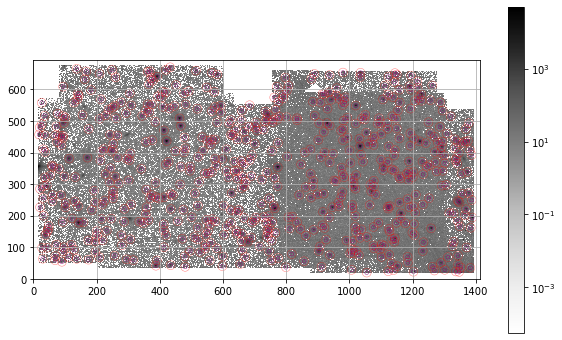

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1054.7887 20.391334            nan            nan
  2 1347.2731  22.44349            nan            nan
  3 1202.6284 23.078684            nan            nan
  4 1337.0718 23.888878      8713.0041            nan
  5 1122.9374 24.809937      1672.0986            nan
  6 1269.0904 26.909186       6763.025            nan
  7 1139.7435 28.324083      4229.8905            nan
  8 1006.8038 28.936189            nan            nan
  9 1301.6992  29.11976      11866.238            nan
 10 1382.9784 35.367733      4957.4886            nan
...       ...       ...            ...            ...
622 1035.1606 653.03797            nan            nan
623 979.68707 653.49731            nan            nan
624 361.43968 655.35047      2348.0948       4990.894
625 167.54726 657.03536      6540.1474      2954.1274
626  369.4683 657.68469     

No. of stars detected: 669


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


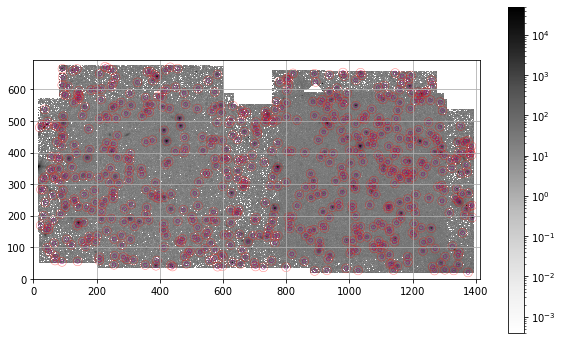

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1375.3958 20.927293            nan            nan
  2  889.8375 25.537549            nan            nan
  3 1027.3749 27.305606      3949.7754            nan
  4 1269.1493  27.04358      8382.8067            nan
  5   1330.36 27.270775      21486.603            nan
  6 928.75069 27.458872      3085.7106            nan
  7 1139.8247 28.408824      5270.3766            nan
  8  1301.916  29.20576      13504.432            nan
  9 989.35779 33.648169      3535.0768      12506.703
 10 799.64114 37.414851            nan            nan
...       ...       ...            ...            ...
660 369.14239 656.86158      4191.0121      14832.461
661 125.03884 659.15432      11724.745            nan
662 249.05214 661.26101      4006.9563      9670.0227
663 418.86885 662.03444      7685.9437            nan
664 91.739122 665.26728     

No. of stars detected: 674


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


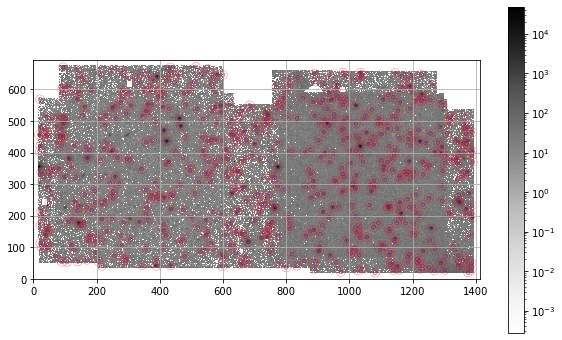

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1081.2102 20.149798            nan            nan
  2 1375.5459 20.907784            nan            nan
  3  973.0201 22.666435            nan            nan
  4 1026.8608 27.234142      3260.3171            nan
  5 1269.5236 27.140677      7313.1754            nan
  6 1139.9345 28.507745      5260.4588            nan
  7 1384.2359 27.408969      7188.2516            nan
  8 1302.3342 28.958571      12568.864            nan
  9 1157.6783  29.22034      3582.2246            nan
 10 889.98564 32.690894      2970.3945            nan
...       ...       ...            ...            ...
665 979.71718 653.46248            nan            nan
666 1035.2407 653.05532            nan            nan
667 444.25536 654.61376      1509.6009      8874.5396
668 249.35069 661.22179      2493.4664      6676.7593
669 281.90978 661.98502     

No. of stars detected: 659


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


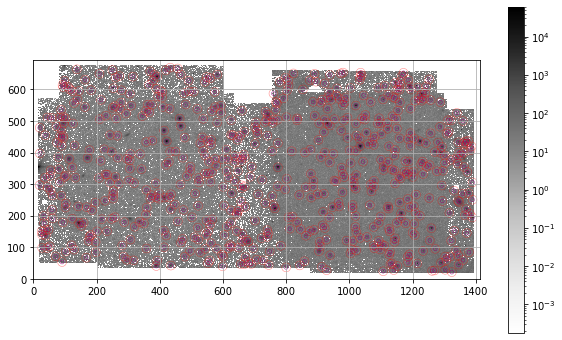

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1324.2009 21.928349            nan            nan
  2 1107.0896 24.742848      9617.1167            nan
  3 1261.7845 25.844353      6122.6319            nan
  4  1269.507 27.154772      7181.0147            nan
  5 927.94953 27.861546      2684.9399            nan
  6 1140.5292 28.348058      5119.8664            nan
  7 1302.9686 29.268576      13470.762            nan
  8 799.78091 36.906873            nan            nan
  9 912.67476 38.422757      3279.9726      10088.442
 10 598.66308  40.34148            nan            nan
...       ...       ...            ...            ...
650 972.87088 650.68296      1828.1234            nan
651 1171.1191 652.72112            nan            nan
652 979.64856 653.41757      5199.7872            nan
653 1035.4766 653.22358            nan            nan
654  369.5652 657.11547     

In [18]:
sigma_level = 6.
sigma_level_PSF = 20.
FWHM = 5.
r_ap = 6.
r_in = 6.
r_out = 14.
roundness = 0.5

base_dir = 'data/PAL5/*/'
for filename in glob.glob(base_dir + 'PAL5__e[0-9]_3p6um.fits', recursive=True) + glob.glob(base_dir + 'PAL5__e[0-9][0-9]_3p6um.fits', recursive=True):
    
    ###   OPENING FITS FILE AND CONVERTING TO COUNTS   ###
    
    with fits.open(filename) as hdu_list:        
        print(filename)
        image_data = hdu_list[0].data
        hdr = hdu_list[0].header
        exptime = hdr['EXPTIME']
        fluxconv = hdr['FLUXCONV']
        print('EXPTIME: {0}\nFLUXCONV: {1}'.format(exptime, fluxconv))
        data = image_data * exptime / fluxconv
        
    mean, median, std = sigma_clipped_stats(data, sigma=4.)
    print('Mean: {0}\nMedian: {1}\nStd dev: {2}'.format(mean, median, std))
    
    ###   LOCATING STARS AND PLOTTING THEM   ###
    # could maybe put most of this in its own starfind function? including aperture and position bits

    daofind = DAOStarFinder(threshold=sigma_level*std, fwhm=FWHM, roundlo=-roundness, roundhi=roundness)
    sources = daofind(data - median)
    pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
    apertures = CircularAperture(pos, r_ap)
    annuli = CircularAnnulus(pos, r_in, r_out)
    print('No. of stars detected: {0}'.format(len(sources)))
    plotting(data, apertures, annuli, 'Greys')
    
    ###   DOING APERTURE PHOTOMETRY   ###
    
    phot_table = ap_phot(data, apertures, annuli, 'blob')
    print_table_nicely(phot_table)